In [66]:
# source: http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

In [1]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

Automatically created module for IPython interactive environment


In [56]:
n_color = 64

# load the picture
china = load_sample_image('china.jpg')
# divide each pixel by 255 so that the range is between [0,1]
china = np.array(china,dtype=np.float64)/255

D:\anaconda\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
D:\anaconda\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [57]:
# transform into a 2d array
(w,h,d) = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china,(w*h,d))

In [58]:
print('Fitting model on a small sub-sample of the data')
t0 = time()
image_array_sample = shuffle(image_array,random_state = 0)[:1000]
kmeans = KMeans(n_clusters=n_color,random_state=0).fit(image_array_sample)
print('done in %0.3fs.' % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.368s.


In [59]:
# get labels for all points
print('Predicting color indices on the full image(k-means)')
t0 = time()
labels = kmeans.predict(image_array)
print('done in %0.3fs.' % (time() - t0))

Predicting color indices on the full image(k-means)
done in 0.262s.


In [60]:
code_book_random = shuffle(image_array,random_state = 0)[:n_color + 1]
print('Predicting color indices on the full image (random)')
t0 = time()
labels_random = pairwise_distances_argmin(code_book_random,image_array,axis=0)
print('done in %0.3fs.' % (time() - t0))

Predicting color indices on the full image (random)
done in 0.257s.


In [61]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the codebook and labels"""
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

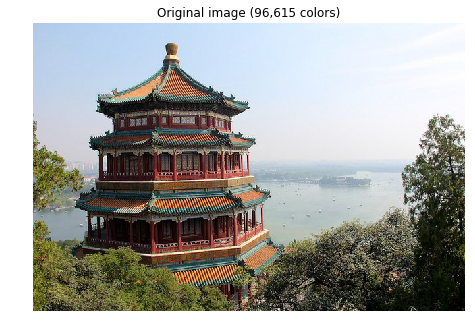

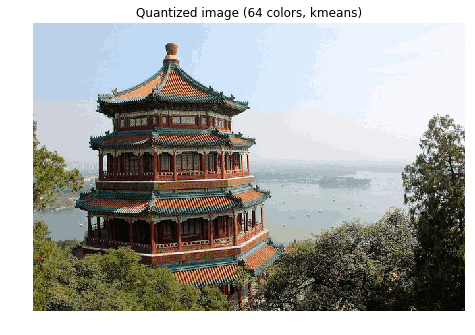

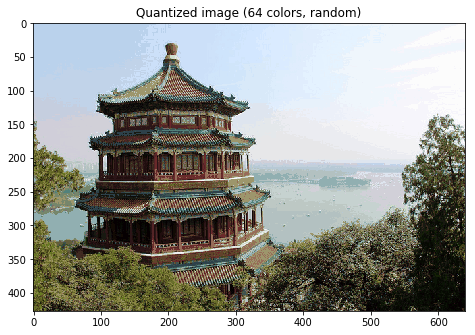

In [65]:
# display all results, alongside the original image
plt.figure(1)
# plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
# plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Quantized image (64 colors, kmeans)')
plt.imshow(recreate_image(kmeans.cluster_centers_,labels, w, h))

plt.figure(3)
# plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Quantized image (64 colors, random)')
plt.imshow(recreate_image(code_book_random,labels_random,w,h))